In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
#Check the columns in each table -measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#Check the columns in each table -station
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print (f' The most recent date in the data set is {recent_date}.')

 The most recent date in the data set is ('2017-08-23',).


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print (f' One year from the last date in the data set is {query_date}.')

# Perform a query to retrieve the date and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation)
precipitation_df.set_index('date', inplace = True)

# Sort the dataframe by date
precipitation_df.sort_values(by = 'date')

#Rename the column to have a better display
precipitation_df = precipitation_df.rename(columns={"prcp": "Precipitation"})
precipitation_df.head()

 One year from the last date in the data set is 2016-08-23.


,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


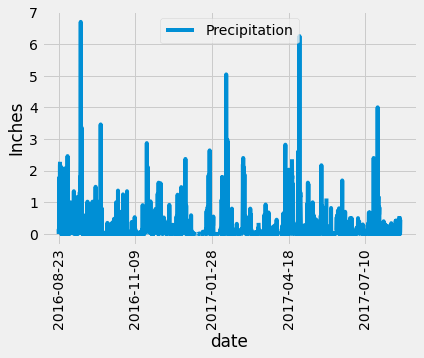

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(rot=90)
plt.ylabel("Inches")
plt.savefig("fig_precipitation.png")
plt.show()


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station.name).count()
print (f' The total number stations in the dataset is {stations}.')

 The total number stations in the dataset is 9.


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Most active USC00519281 2772

temp = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
#Convert the tuple into normal list
temp_list = np.ravel(temp)

print (f' The most active station is {str(temp_list[0])}, with lowest temp = {str(temp_list[1])}F, highest temp = {str(temp_list[2])}F and average temp = {str(temp_list[3])}F.')

 The most active station is USC00519281, with lowest temp = 54.0F, highest temp = 85.0F and average temp = 71.66378066378067F.


<function matplotlib.pyplot.show(close=None, block=None)>

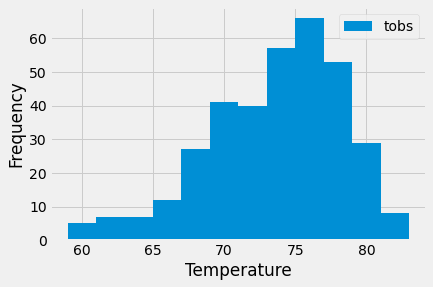

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

temperature = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= query_date, measurement.station == 'USC00519281').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
temperature_df = pd.DataFrame(temperature)
temperature_df.set_index('date', inplace = True)

# Sort the dataframe by date
temperature_df.sort_values(by = 'date')
n_bins = 12
temperature_df.plot.hist(bins = n_bins)
plt.xlabel("Temperature")
plt.savefig("fig_histogram.png")
plt.show

# Close session

In [20]:
# Close Session
session.close()